**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


MACD因子

In [15]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
from jaqs_fxdayu.data.hf_dataview import HFDataView
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'C:\Users\WSQ\Desktop\信号试题/min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '4H,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

dv4H = HFDataView()
dv4H.create_init_dv(Time_dict['4H'].dropna().set_index(["trade_date","symbol"]))
dv4H.add_formula('MACD',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True)
dv4H.add_formula('MACD_Signal',"Ta('EMA',0,0,0,0,MACD,0,9)",add_data=True)
dv4H.add_formula('MACD_Hist',"(MACD-MACD_Signal)",add_data=True)

def Plot_Mean(dv, MACD_Hist, MACD_Signal,MACD,chart_name='dv4H_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD_Hist.iloc[n:],color='blue',alpha=1)
    ax1.plot(MACD_Signal.iloc[n:],color='green',alpha=1)
    ax1.plot(MACD.iloc[n:],color='red',alpha=0.3)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    plt.show()

MACD=dv4H.get_ts('MACD', date_type='datetime') 
MACD_Signal=dv4H.get_ts('MACD_Signal', date_type='datetime') 
MACD_Hist=dv4H.get_ts('MACD_Hist', date_type='datetime') 

Initialize dataview success.


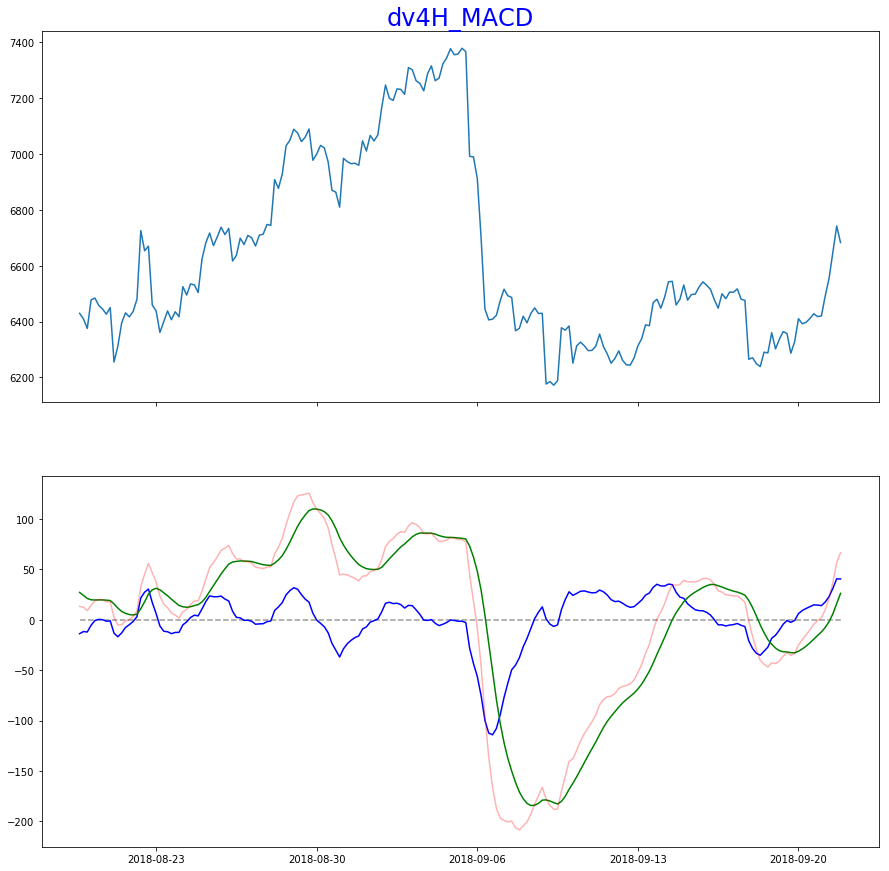

In [16]:
Plot_Mean(dv4H, MACD_Hist.iloc[:,0], MACD_Signal.iloc[:,0], MACD.iloc[:,0], n=-200)

第一个因子为MACD因子，通过观察发现MACD与价格的升降趋势有关 主要表现为MACD上穿0值时出现上涨趋势，下穿0值时出现下跌趋势。macd信号线更能反映价格变化情况，当MACD信号线下降时候，价格降低。macd,signal,hist依次滞后。
进场信号：MACD上穿0值时看多，下穿0值时看空

Initialize dataview success.


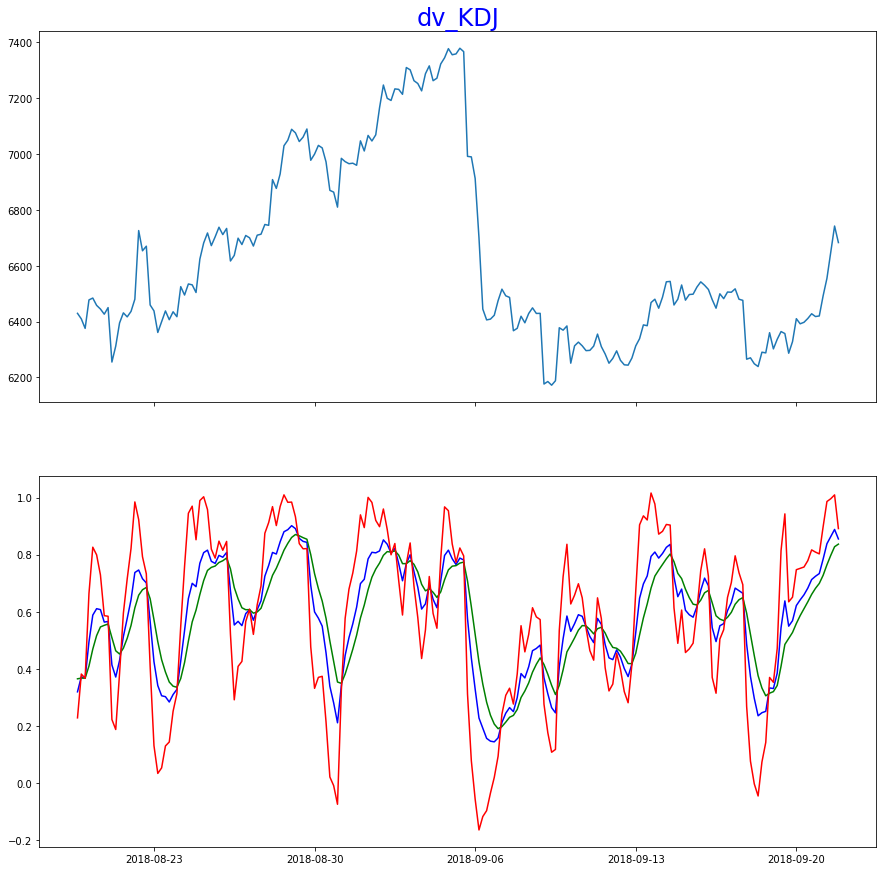

In [22]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
from jaqs_fxdayu.data.hf_dataview import HFDataView
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'C:\Users\WSQ\Desktop\信号试题/min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '4H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
data4H = Time_dict.set_index('datetime')

def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='dv_KDJ', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=1,color='blue')
    ax1.plot(KDJ_D_A.iloc[n:], alpha=1,color='green')
    ax1.plot(KDJ_J_A.iloc[n:], alpha=1,color='red')
    plt.show()

dv4H = HFDataView()
dv4H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv4H.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv4H.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv4H.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv4H.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

KDJ_K_A = dv4H.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv4H.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv4H.get_ts('KDJ_J_A', date_type='datetime')
Plot_Mean(dv4H, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0], n=-200)

K与D值永远介于到0到1之间。D大于0.8时，行情呈现超买现象。D小于0.2时，行情呈现超卖现象
上涨趋势中，K值大于D值，K线向上突破D线时，为买进信号。下跌趋势中，K值小于D值，K线向下跌破D线时，为卖出信号
当随机指标与股价出现背离时，一般为转势的信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

MACD因子 
与价格趋势相关 MACD线上穿、下穿0轴，即为进出场信号
进出场条件：当MACD线先上穿0轴，可以开多单，当MACD线下穿0轴，及时平仓，并开空单，当回穿0轴时候及时平仓

KDJ
当KDJ三个值整体处于0.2以下的话，显示市场为超卖区；如果整体处于0.8以上的话则代表市场显示为超买区
当K值大于D值的时候，行情趋势上涨，K线向上突破D线时，显示买入的信号，反之K线向下突破D值的时候，显示卖出的信号。
信号：当三条线在0.2以下并交叉，即可以买入
      但个三条线在0.8以上，即可以做空